<a href="https://colab.research.google.com/github/rainforest01-coder/ESAA_files/blob/main/ESAA_WEEK5_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#chapter03 평가

성능 평가 지표: 모델이 분류냐 회귀냐에 따라 여러 종류로 나뉨
* 회귀: 오차 평균값 기반
* 분류: 이진 분류, 멀티분류
  * 성능 평가 지표
  >정확도, 오차행렬, 정밀도, 재현율, F1스코어, ROC AUC

##01 정확도

정확도=예측결과가 동일한 데이터 건수/전체 데이터 예측 건수

그러나 이진 분류는 데이터의 구성에 따라 ML 모델의 성능을 왜곡할 수 있음

In [3]:
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
  def fit(self,X,y=None):
    pass
  def predict(self,X):
    pred=np.zeros((X.shape[0],1))
    for i in range(X.shape[0]):
      if X['Sex'].iloc[i]==1:
        pred[i]=0
      else:
        pred[i]=1
    return pred

In [9]:
from sklearn.preprocessing import LabelEncoder
#Null처리 함수
def fillna(df):
  df['Age'].fillna(df['Age'].mean(),inplace=True)
  df['Cabin'].fillna('N',inplace=True)
  df['Embarked'].fillna('N',inplace=True)
  df['Fare'].fillna(0,inplace=True)
  return df
#불필요한 피처 제거
def drop_features(df):
  df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
  return df
#레이블 인코딩 수행
def format_features(df):
  df['Cabin']=df['Cabin'].str[:1]
  features=['Cabin','Sex','Embarked']
  for feature in features:
    le=LabelEncoder()
    le=le.fit(df[feature])
    df[feature]=le.transform(df[feature])
  return df

  #앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
  df=fillna(df)
  df=drop_features(df)
  df=format_features(df)
  return df

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

titanic_df=pd.read_csv('/content/drive/MyDrive/ESAA/week4/titanic_train.csv')
y_titanic_df=titanic_df['Survived']
X_titanic_df=titanic_df.drop('Survived',axis=1)
X_titanic_df=transform_features(X_titanic_df)
X_train, X_test,y_train,y_test=train_test_split(X_titanic_df,y_titanic_df,test_size=0.2,random_state=0)

/tmp/ipython-input-2416264996.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)
/tmp/ipython-input-2416264996.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [11]:
myclf=MyDummyClassifier()
myclf.fit(X_train,y_train)
mypredictions=myclf.predict(X_test)
print('Dummy Classifier의 정확도는: {0:.4f}'.format(accuracy_score(y_test,mypredictions)))

Dummy Classifier의 정확도는: 0.7877


단순한 알고리즘으로 예측을 하더라도 게이터의 구성에 따라 정확도가 높을 수 있어 정확도를 평가 지표로 사용할 때 매우 신중해야함

MNIST데이터 예제

In [12]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
  def fit(self,X,y):
    pass
  def predict(self,X):
    return np.zeros((len(X),1),dtype=bool)
digits=load_digits()
y=(digits.target==7).astype(int)
X_train,X_test,y_train,y_test=train_test_split(digits.data,y,random_state=11)

In [16]:
print('레이블 테스트 세트 크기: ',y_test.shape)
print('테스트 세트 레이블 0과 1의 분포도')
print(pd.Series(y_test).value_counts())

레이블 테스트 세트 크기:  (450,)
테스트 세트 레이블 0과 1의 분포도
0    405
1     45
Name: count, dtype: int64


In [15]:
fakeclf=MyFakeClassifier()
fakeclf.fit(X_train,y_train)
fakepred=fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는:{:.3f}'.format(accuracy_score(y_test,fakepred)))

모든 예측을 0으로 하여도 정확도는:0.900


정확도 평가 지표는 불균형한 레이블 데이터 세트에서는 성능 수치로 사용하면 안됨

## 오차행렬

학습된 분류 모델이 예측을 수행하면서 얼마나 헷갈리고 있는지 함꼐 보여주는 지표

즉 이진 분류의 예측 오류가 얼마인지와 더불어 어떠한 유형의 예측 오류가 발생하고 있는지 함께 나타내는 지표

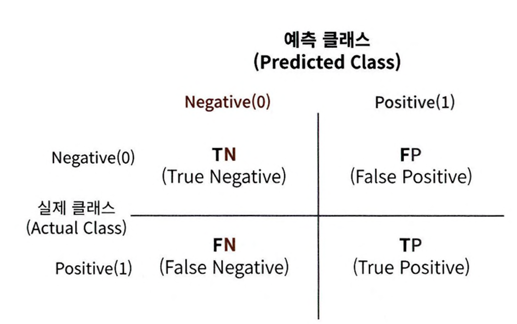

      예측 / 실제
* TN:   0  /   0
* FP:   1   /  0
* FN:   0   /  1
* TP:   1   /  1

In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,fakepred)


array([[405,   0],
       [ 45,   0]])

정확도=(TN+TP)/(TN+FP+TP+FN)
불균형한 이진 분류 데이터 세트에서는 Positive데이터 건수가 매우 작기 때문에 Negative 예측 정확도가 높아지는 경향 발생
(TN증가 TP감소)

##03 정밀도와 재현율

* 정밀도: TP/(FP+TP)
  * 예측을 P로 한 것 중에 실제 값이 P로 일치한 비율
  * N 데이터 예측을 P로 잘못 판단하게 되면 업무상에 영향이 발생하는 경우
  * FP를 낮추는데 초점
  * precision_score()
* 재현율: TP/(FN+TP)
  * 실제 값이 P인 대상 중에 예측과 실제 값이 P로 일치한 데이터의 비율(민감도 또는 TPR으로도 불림)
  * 실제 P 데이터를 N으로 잘못 판단하면 업무상 큰 영향이 발생하는 경우 ex 암 판단 모델
  * FN 낮추는데 초점
  *recall_score()

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test,pred):
  confusion=confusion_matrix(y_test,pred)
  accuracy=accuracy_score(y_test,pred)
  precision=precision_score(y_test,pred)
  recall=recall_score(y_test,pred)
  print('오차행렬')
  print(confusion)
  print('정확도:{0:.4f}, 정밀도{1:.4f}:,재현율:{2:.4f}'.format(accuracy,precision,recall))


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

titanic_df=pd.read_csv('/content/drive/MyDrive/ESAA/week4/titanic_train.csv')
y_titanic_df=titanic_df['Survived']
X_titanic_df=titanic_df.drop('Survived',axis=1)
X_titanic_df=transform_features(X_titanic_df)
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df,y_titanic_df,test_size=0.2,random_state=11)
lr_clf=LogisticRegression(solver='liblinear')
lr_clf.fit(X_train,y_train)
pred=lr_clf.predict(X_test)
get_clf_eval(y_test,pred)


오차행렬
[[108  10]
 [ 14  47]]
정확도:0.8659, 정밀도0.8246:,재현율:0.7705


/tmp/ipython-input-2416264996.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)
/tmp/ipython-input-2416264996.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

###정밀도/재현율 트레이드오프

> 정밀도, 재현율은 한 쪽을 강제로 높이면 다른 하나의 수치가 떨어짐

사이킷런의 분류 알고리즘은 예측 데이터가 특정 레이블에 속하는지를 계산하기 위해 개별 레이블별로 결정 확률 구해 최종 예측 결정

predict_proba():
* 개별 데이터별로 예측 확률 반환
* Classifier객체에서 호출 가능
* 테스트 피처 데이터 세트를 파라미터로 입력해주면 테스트 피처 레코드의 개별 클래스 예측 확률 반환
* 이진 분류에서 첫 번째 칼럼은 0 Negative의 확률, 두 번째
칼럼은 1 Positive의 확률

In [21]:
pred_proba=lr_clf.predict_proba(X_test)
pred=lr_clf.predict(X_test)
print('pred_proba()의 결과 shape: {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])
pred_proba_result=np.concatenate([pred_proba,pred.reshape(-1,1)],axis=1)
print('두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측\n', pred_proba_result[:3])



pred_proba()의 결과 shape: (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.44935227 0.55064773]
 [0.86335512 0.13664488]
 [0.86429645 0.13570355]]
두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측
 [[0.44935227 0.55064773 1.        ]
 [0.86335512 0.13664488 0.        ]
 [0.86429645 0.13570355 0.        ]]


In [22]:
from sklearn.preprocessing import Binarizer

X=[[1,-1,2],
   [2,0,0],
   [0,1.1,1.2]]
binarizer=Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [23]:
from sklearn.preprocessing import Binarizer
custom_threshold=0.5
pred_proba_1=pred_proba[:,1].reshape(-1,1)
binarizer=Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict=binarizer.transform(pred_proba_1)
get_clf_eval(y_test,custom_predict)

오차행렬
[[108  10]
 [ 14  47]]
정확도:0.8659, 정밀도0.8246:,재현율:0.7705


In [24]:
#임곗값 0.4로 낮추기
custom_threshold=0.4
pred_proba_1=pred_proba[:,1].reshape(-1,1)
binarizer=Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict=binarizer.transform(pred_proba_1)
get_clf_eval(y_test,custom_predict)

오차행렬
[[97 21]
 [11 50]]
정확도:0.8212, 정밀도0.7042:,재현율:0.8197


임곗값을 낮출수록 True값이 많아짐
정밀도 낮아지고 재현율 올라감

In [25]:
# 여러 임곗값의 평가지표

thresholds=[0.4,0.45,0.5,0.55,0.6]

def get_eval_by_threshold(y_test,pred_proba_c1,thresholds):
  for custom_threshold in thresholds:
    binarizer=Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
    custom_predict=binarizer.transform(pred_proba_c1)
    print('임곗값:',custom_threshold)
    get_clf_eval(y_test,custom_predict)

get_eval_by_threshold(y_test,pred_proba[:,1].reshape(-1,1),thresholds)

임곗값: 0.4
오차행렬
[[97 21]
 [11 50]]
정확도:0.8212, 정밀도0.7042:,재현율:0.8197
임곗값: 0.45
오차행렬
[[105  13]
 [ 13  48]]
정확도:0.8547, 정밀도0.7869:,재현율:0.7869
임곗값: 0.5
오차행렬
[[108  10]
 [ 14  47]]
정확도:0.8659, 정밀도0.8246:,재현율:0.7705
임곗값: 0.55
오차행렬
[[111   7]
 [ 16  45]]
정확도:0.8715, 정밀도0.8654:,재현율:0.7377
임곗값: 0.6
오차행렬
[[113   5]
 [ 17  44]]
정확도:0.8771, 정밀도0.8980:,재현율:0.7213


이와 유사한 사이킷런 API

precision_recall_curve(y_true,probas_pred)
* 실제 클래스값 배열, p칼럼의 예측 확률 배열
* 반환값: 정밀도, 재현율
* 일반적으로 0.11~0.95정도의 임곗값을 담음

In [31]:
#임곗값을 15단계로
from sklearn.metrics import precision_recall_curve
pred_proba_class1=lr_clf.predict_proba(X_test)[:,1]
precisions,recalls,thresholds=precision_recall_curve(y_test,pred_proba_class1)
print('반환된 분류 결정 임곗값 배열의 shape: ',thresholds.shape)

thr_index=np.arange(18,thresholds.shape[0],15)
print('샘플 추출을 위한 임계값 배열의 index 10개',thr_index)
print('샘플용 10개의 임계값',np.round(thresholds[thr_index],2))

print('샘플 임계값별 정밀도: ',np.round(precisions[thr_index],3))
print('샘플 임계값별 재현율: ',np.round(recalls[thr_index],3))

반환된 분류 결정 임곗값 배열의 shape:  (165,)
샘플 추출을 위한 임계값 배열의 index 10개 [ 18  33  48  63  78  93 108 123 138 153]
샘플용 10개의 임계값 [0.12 0.13 0.15 0.17 0.26 0.38 0.49 0.63 0.76 0.9 ]
샘플 임계값별 정밀도:  [0.379 0.424 0.455 0.519 0.618 0.676 0.797 0.93  0.964 1.   ]
샘플 임계값별 재현율:  [1.    0.967 0.902 0.902 0.902 0.82  0.77  0.656 0.443 0.213]


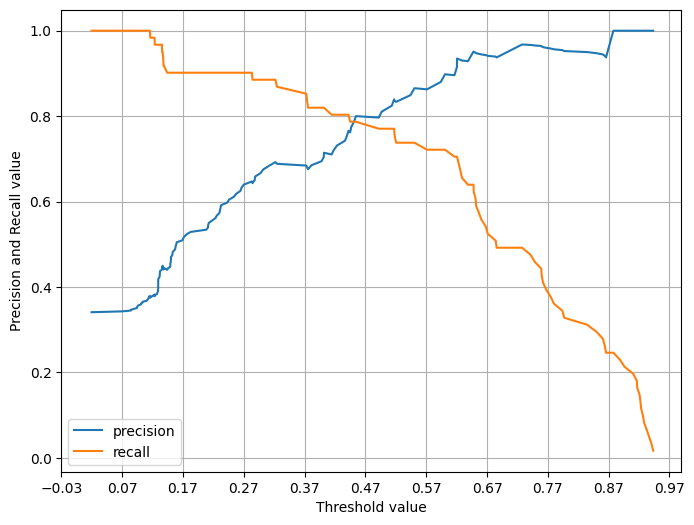

In [43]:
#이를 통해 정밀도와 재현율의 임곗값에 따른 값 변화 곡선 시각화 가능
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test,pred_proba_c1):
  precisions,recalls,thresholds=precision_recall_curve(y_test,pred_proba_c1)

  plt.figure(figsize=(8,6))
  threshold_boundary=thresholds.shape[0]
  plt.plot(thresholds,precisions[0:threshold_boundary],linestyle='-',label='precision')
  plt.plot(thresholds,recalls[0:threshold_boundary],label='recall')

  start, end=plt.xlim()
  plt.xticks(np.round(np.arange(start,end,0.1),2))

  plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
  plt.legend(); plt.grid()
  plt.show()

precision_recall_curve_plot(y_test,lr_clf.predict_proba(X_test)[:,1])

0.45 지점에서 비슷해짐


###정밀도와 재현율의 맹점

* 정밀도: 정말 확실한 경우를 제외하고 모두 N으로 예측하면 정확도 100% 나옴
* 재현율: 모두 P로 예측하면 정확도
> 정밀도와 재현율 둘 중 하나만 강조해서는 안됨

## 04 F1 스코어

F1스코어는 정밀도와 재현율을 결합한 지표
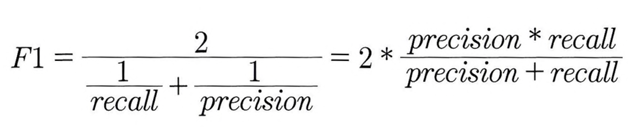
> 둘 중 어느 한쪽으로 치우치지 않을 때 상대적으로 높은 값을 가짐
 f1_score()

In [44]:
from sklearn.metrics import f1_score
f1=f1_score(y_test,pred)
print('F1스코어: {0:.4f}'.format(f1))

F1스코어: 0.7966


In [49]:
#타이타닉 생존자 예측에서 F1스코어 포함 평가지표

def get_clf_eval(y_test,pred):
  confusion=confusion_matrix(y_test,pred)
  accuracy=accuracy_score(y_test,pred)
  precision=precision_score(y_test,pred)
  recall=recall_score(y_test,pred)
  f1=f1_score(y_test,pred)
  print('오차행렬')
  print(confusion)
  print('정확도:{0:.4f} , 정밀도:{1:.4f} , 재현율:{2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))

thresholds=[0.4,0.45,0.5,0.55,0.6]
pred_proba=lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1),thresholds)

임곗값: 0.4
오차행렬
[[97 21]
 [11 50]]
정확도:0.8212 , 정밀도:0.7042 , 재현율:0.8197, F1:0.7576
임곗값: 0.45
오차행렬
[[105  13]
 [ 13  48]]
정확도:0.8547 , 정밀도:0.7869 , 재현율:0.7869, F1:0.7869
임곗값: 0.5
오차행렬
[[108  10]
 [ 14  47]]
정확도:0.8659 , 정밀도:0.8246 , 재현율:0.7705, F1:0.7966
임곗값: 0.55
오차행렬
[[111   7]
 [ 16  45]]
정확도:0.8715 , 정밀도:0.8654 , 재현율:0.7377, F1:0.7965
임곗값: 0.6
오차행렬
[[113   5]
 [ 17  44]]
정확도:0.8771 , 정밀도:0.8980 , 재현율:0.7213, F1:0.8000


임곗값이 0.6일 때 가장 좋으나 재현율 크게 감소

## ROC 곡선과 AUC

ROC곡선과 이에 기반한 AUC 스코어는 이진 분류의 예측 성능 측정에서 중요하게 사용되는 지표
* ROC곡선: FPR(False Positive Rate)가 변할 때 TPR(True Positive Rate,재현율,민감도)가 어떻게 변하는지 나타내는 곡선

* TPR(True Positive Rate,재현율,민감도): 실제값 P가 정확하게 예측돼야 하는 수준

* TNR:True Negatibe Rate(특이성)/ 실제 값 N이 정확히 예측되어야 하는 수준
  * TNR = TN / ( FP + TN )
*  FPR(False Positive Rate)
    * FP / ( FP + TN), 1 - TNR,
1 - 특이성

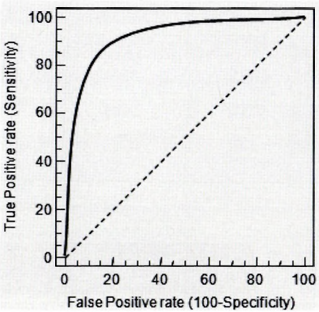

가운데 직선에 가까울수록 성능이 떨어지고 멀수록 성능이 뛰어남
임계값 변경으로 FPR 변경 가능
임계값이 1인 경우 FPR=0
임계값이 0인 경우 FPR=1




roc_curve()
* 입력 파라미터
  * y_true:실제 클래스 값 array
  * y_score: predict_proba()의 반환값 array에서 두번째 칼럼
* 반환 값
  * fpr
  * tpr
  * trhesholds


In [50]:
from sklearn.metrics import roc_curve
pred_proba_class1=lr_clf.predict_proba(X_test)[:,1]
fprs, tprs, thresholds=roc_curve(y_test,pred_proba_class1)
thr_index=np.arange(1,thresholds.shape[0],5)
print('thr_index.shape:',thr_index.shape)
print('thresholds:',np.round(thresholds[thr_index],2))

print('샘플 임곗값별 FPR:',np.round(fprs[thr_index],3))
print('샘플 임곗값별 TPR:',np.round(tprs[thr_index],3))

thr_index.shape: (10,)
thresholds: [0.94 0.73 0.62 0.52 0.44 0.28 0.15 0.14 0.13 0.12]
샘플 임곗값별 FPR: [0.    0.008 0.025 0.076 0.127 0.254 0.576 0.61  0.746 0.847]
샘플 임곗값별 TPR: [0.016 0.492 0.705 0.738 0.803 0.885 0.902 0.951 0.967 1.   ]


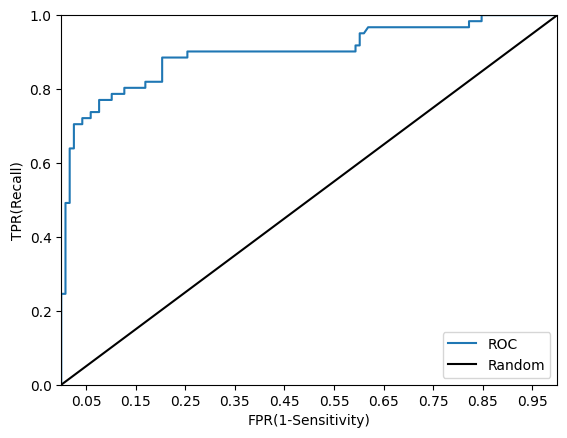

In [51]:
def roc_curve_plot(y_test, pred_proba_c1):
  fprs, tprs, thresholds=roc_curve(y_test,pred_proba_class1)
  plt.plot(fprs,tprs,label='ROC')
  plt.plot([0,1],[0,1],'k-',label='Random')
  start,end=plt.xlim()
  plt.xticks(np.round(np.arange(start,end,0.1),2))
  plt.xlim(0,1)
  plt.ylim(0,1)
  plt.xlabel('FPR(1-Sensitivity)')
  plt.ylabel('TPR(Recall)')
  plt.legend()
  plt.show()

roc_curve_plot(y_test,pred_proba[:,1])

AUC(Area Under Curve):: ROC곡선 밑의 면적/1에 가까울수록 좋음
* FPR이 작은 상태에서 얼마나 큰 TPR을 얻을 수 있느냐가 관건
* 가운데 직선의 밑면적이 0.5 따라서 보통 0.5 넘음

In [52]:
from sklearn.metrics import roc_auc_score

pred_proba=lr_clf.predict_proba(X_test)[:,1]
roc_score=roc_auc_score(y_test,pred_proba)
print('ROC AUC값: {0:.4f}'.format(roc_score))

ROC AUC값: 0.8987


In [60]:
def get_clf_eval(y_test,pred=None,pred_proba=None):
  confusion=confusion_matrix(y_test,pred)
  accuracy=accuracy_score(y_test,pred)
  precision=precision_score(y_test,pred)
  recall=recall_score(y_test,pred)
  f1=f1_score(y_test,pred)
  roc_auc=roc_auc_score(y_test,pred_proba)
  print('오차행렬')
  print(confusion)
  print('정확도:{0:.4f} , 정밀도:{1:.4f} , 재현율:{2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1,roc_auc))


##06 피마 인디언 당뇨병 예측

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pit
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

diabetes_data = pd.read_csv('/content/drive/MyDrive/ESAA/week5/diabetes.csv')
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head(3)

Outcome
0    500
1    268
Name: count, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [57]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [69]:
X=diabetes_data.iloc[:,:-1]
y=diabetes_data['Outcome']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=156,stratify=y)

In [73]:
lr_clf=LogisticRegression(solver='liblinear')
lr_clf.fit(X_train,y_train)
pred=lr_clf.predict(X_test)
pred_proba=lr_clf.predict_proba(X_test)[:,1]
get_clf_eval(y_test,pred,pred_proba)

오차행렬
[[87 13]
 [22 32]]
정확도:0.7727 , 정밀도:0.7111 , 재현율:0.5926, F1:0.6465, AUC:0.8083


In [83]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test,pred_proba_c1):
  precisions,recalls,thresholds=precision_recall_curve(y_test,pred_proba_c1)

  plt.figure(figsize=(8,6))
  threshold_boundary=thresholds.shape[0]
  plt.plot(thresholds,precisions[0:threshold_boundary],linestyle='-',label='precision')
  plt.plot(thresholds,recalls[0:threshold_boundary],label='recall')

  start, end=plt.xlim()
  plt.xticks(np.round(np.arange(start,end,0.1),2))

  plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
  plt.legend(); plt.grid()
  plt.show()

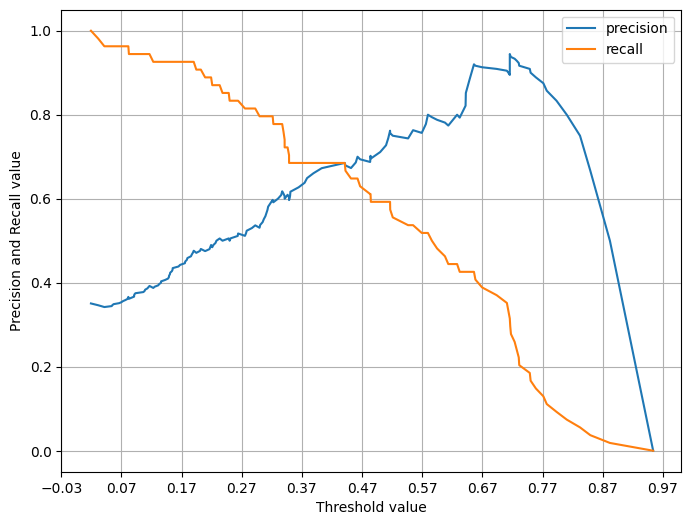

In [84]:
pred_proba_c1=lr_clf.predict_proba(X_test)[:,1]
precision_recall_curve_plot(y_test.values,pred_proba_c1)

In [85]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


 0일 수 없는 값들의 min이 0

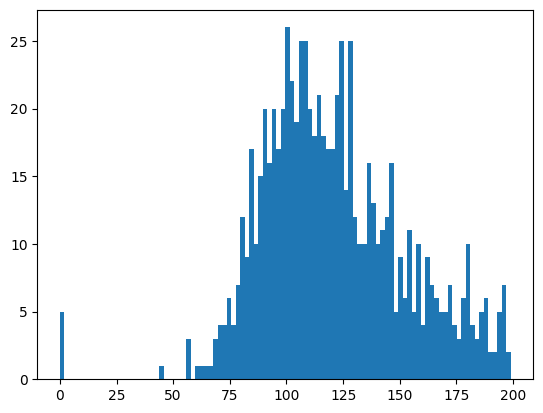

In [86]:
plt.hist(diabetes_data['Glucose'],bins=100)
plt.show()

0값 5대 존재
min()이 0인 피처에 대해 전체 데이터 건수 대비 몇퍼센트의 비율로 존재하는지 확인

In [87]:
zero_features=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
total_count=diabetes_data['Glucose'].count()
for feature in zero_features:
  zero_count=diabetes_data[diabetes_data[feature]==0][feature].count()
  print('{0} 0 건수는 {1}, 퍼센트는{2:.2f}%'.format(feature,zero_count,100*zero_count/total_count))

Glucose 0 건수는 5, 퍼센트는0.65%
BloodPressure 0 건수는 35, 퍼센트는4.56%
SkinThickness 0 건수는 227, 퍼센트는29.56%
Insulin 0 건수는 374, 퍼센트는48.70%
BMI 0 건수는 11, 퍼센트는1.43%


0값을 피처의 평균값으로 대체

In [88]:
mean_zero_features=diabetes_data[zero_features].mean()
diabetes_data[zero_features]=diabetes_data[zero_features].replace(0,mean_zero_features)

피처 스케일링 적용해 변환
로지스틱 회귀의 경우 일반적으로 숫자 데이터에 스케일링을 적용하는 것이 좋음

In [90]:
X=diabetes_data.iloc[:,:-1]
y=diabetes_data.iloc[:,-1]

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=156,stratify=y)

lr_clf=LogisticRegression()
lr_clf.fit(X_train,y_train)
pred=lr_clf.predict(X_test)
pred_proba=lr_clf.predict_proba(X_test)[:,1]
get_clf_eval(y_test,pred,pred_proba)

오차행렬
[[90 10]
 [21 33]]
정확도:0.7987 , 정밀도:0.7674 , 재현율:0.6111, F1:0.6804, AUC:0.8433


성능 개성됐으나 재현율 성능 수치 변화 필요
>임계값 변화